# Fitting a straight line

In [1]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import triangle

import nestle

np.random.seed(0)

In [2]:
def model(theta, x):
    m, c = theta
    return m*x + c

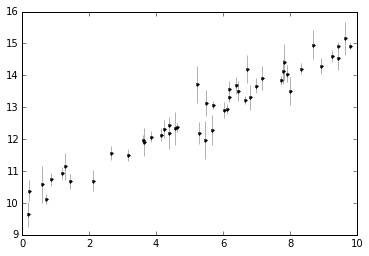

In [3]:
# Generate some data
theta_true = [0.5, 10.0]
N = 50
x = np.sort(10*np.random.rand(N))
y = model(theta_true, x) 
yerr = 0.1+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)
plt.errorbar(x, y, yerr=yerr, capsize=0, fmt='k.', ecolor='.7');

The likelihood function:

In [4]:
def lnlike(theta):
    return -0.5*(np.sum((y-model(theta, x))**2/yerr**2))

Flat prior in $[0 < m < 1]$, $[0 < b < 100]$:

In [5]:
def prior(theta):
    return np.array([1., 100.]) * theta

Run nested sampling:

In [6]:
res = nestle.sample(lnlike, prior, 2, method='single', npoints=1000, maxiter=100000)

In [7]:
print("logz = {0:6.3f} +/- {1:6.3f}".format(res.logz, res.logzerr))
print("iterations: {0:d}".format(res.niter))
print("function calls: {0:d}".format(res.ncall))

logz = -35.898 +/-  0.098
iterations: 14676
function calls: 23610


Plot result distribution:

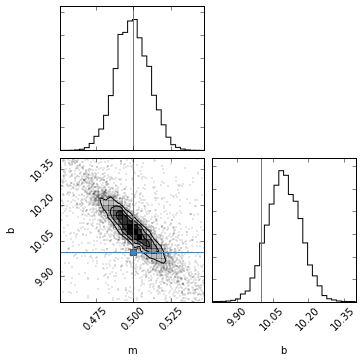

In [8]:
fig = triangle.corner(res.samples, weights=res.weights, labels=['m', 'b'],
                      extents=[0.99999, 0.99999], truths=theta_true, bins=30)

Estimate of mean and covariance:

In [9]:
# weighted average and covariance:
p, cov = nestle.mean_and_cov(res.samples, res.weights)

print("m = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
print("b = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))
print(cov)

m =  0.50 +/-  0.01
b = 10.10 +/-  0.07
[[ 0.00012069 -0.00070542]
 [-0.00070542  0.0050391 ]]


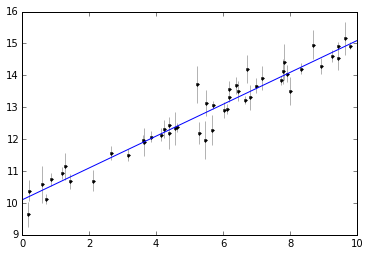

In [10]:
plt.errorbar(x, y, yerr=yerr, capsize=0, fmt='k.', ecolor='.7')
plt.plot([0., 10.], model(p, np.array([0., 10.])), c='k');